In [1]:
### VAR model for Multivariate Time Series Analysis

In [2]:
# Data import as DataFrame
import pandas as pd
EuStocks = pd.read_csv("datasets/eustocks.csv")
EuStocks.head()

,Unnamed: 0,DAX,SMI,CAC,FTSE
0,1,1628.75,1678.1,1772.8,2443.6
1,2,1613.63,1688.5,1750.5,2460.2
2,3,1606.51,1678.6,1718.0,2448.2
3,4,1621.04,1684.1,1708.1,2470.4
4,5,1618.16,1686.6,1723.1,2484.7


In [3]:
# Providing the index to the time series
EuStocks_DF = pd.DataFrame(data = EuStocks.values, columns = ['0', 'DAX', 'SMI', 'CAC', 'FTSE'],
                           index = pd.DatetimeIndex(start = '1991-01-01', periods = 1860, freq = 'B'))
EuStocks_DF = EuStocks_DF.drop(columns = ['0'])
EuStocks_DF.head(20)

C:\Users\darrahts\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,DAX,SMI,CAC,FTSE
1991-01-01,1628.75,1678.1,1772.8,2443.6
1991-01-02,1613.63,1688.5,1750.5,2460.2
1991-01-03,1606.51,1678.6,1718.0,2448.2
1991-01-04,1621.04,1684.1,1708.1,2470.4
1991-01-07,1618.16,1686.6,1723.1,2484.7
1991-01-08,1610.61,1671.6,1714.3,2466.8
1991-01-09,1630.75,1682.9,1734.5,2487.9
1991-01-10,1640.17,1703.6,1757.4,2508.4
1991-01-11,1635.47,1697.5,1754.0,2510.5
1991-01-14,1645.89,1716.3,1754.3,2497.4


In [4]:
# Creating the test for stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    
    #Perform Dickey-Fuller test:
    res = adfuller(ts, autolag='AIC')
    out = pd.Series(res[0:4], index=['statistic', 'p-value', '#lags', '#obs'])
    for key,value in res[4].items():
        out['critical value (%s)'%key] = value
    print(out)

In [5]:
# Loop to check all columns of the DF
import functools
EuStocks_DF.apply(functools.partial(test_stationarity))

statistic                  2.295811
p-value                    0.998953
#lags                     24.000000
#obs                    1835.000000
critical value (1%)       -3.433919
critical value (5%)       -2.863116
critical value (10%)      -2.567609
dtype: float64
statistic                  2.235032
p-value                    0.998910
#lags                     22.000000
#obs                    1837.000000
critical value (1%)       -3.433915
critical value (5%)       -2.863115
critical value (10%)      -2.567608
dtype: float64
statistic                  1.286413
p-value                    0.996532
#lags                     17.000000
#obs                    1842.000000
critical value (1%)       -3.433905
critical value (5%)       -2.863110
critical value (10%)      -2.567606
dtype: float64
statistic                  0.106116
p-value                    0.966476
#lags                     13.000000
#obs                    1846.000000
critical value (1%)       -3.433897
critical value (5%)

DAX     None
SMI     None
CAC     None
FTSE    None
dtype: object

In [6]:
# Differencing to get the data stationary
EuStocksDiff = EuStocks_DF.diff().dropna()
EuStocksDiff.head()

,DAX,SMI,CAC,FTSE
1991-01-02,-15.12,10.4,-22.3,16.6
1991-01-03,-7.12,-9.9,-32.5,-12.0
1991-01-04,14.53,5.5,-9.9,22.2
1991-01-07,-2.88,2.5,15.0,14.3
1991-01-08,-7.55,-15.0,-8.8,-17.9


In [7]:
# Retest the differenced series
EuStocksDiff.apply(functools.partial(test_stationarity))

statistic              -8.293747e+00
p-value                 4.193799e-13
#lags                   1.900000e+01
#obs                    1.839000e+03
critical value (1%)    -3.433911e+00
critical value (5%)    -2.863113e+00
critical value (10%)   -2.567607e+00
dtype: float64
statistic              -8.543303e+00
p-value                 9.652044e-14
#lags                   1.900000e+01
#obs                    1.839000e+03
critical value (1%)    -3.433911e+00
critical value (5%)    -2.863113e+00
critical value (10%)   -2.567607e+00
dtype: float64
statistic              -1.015705e+01
p-value                 7.680823e-18
#lags                   1.600000e+01
#obs                    1.842000e+03
critical value (1%)    -3.433905e+00
critical value (5%)    -2.863110e+00
critical value (10%)   -2.567606e+00
dtype: float64
statistic              -1.079549e+01
p-value                 2.080690e-19
#lags                   1.200000e+01
#obs                    1.846000e+03
critical value (1%)    -3.4338

DAX     None
SMI     None
CAC     None
FTSE    None
dtype: object

In [8]:
# Creating the VAR model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(EuStocksDiff)

In [9]:
# Best model order
modsel = model.select_order(15)
modsel.summary()

,AIC,BIC,FPE,HQIC
0,25.31,25.32*,9.833e+10,25.32
1,25.28,25.34,9.505e+10,25.30*
2,25.28,25.39,9.553e+10,25.32
3,25.27,25.43,9.458e+10,25.33
4,25.26,25.47,9.382e+10,25.34
5,25.26,25.51,9.357e+10,25.35
6,25.26,25.56,9.332e+10,25.37
7,25.26,25.61,9.361e+10,25.39
8,25.26,25.66,9.371e+10,25.41
9,25.26,25.70,9.314e+10,25.42


In [10]:
# Automated model order selection
results = model.fit(maxlags=15, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 09, Nov, 2019
Time:                     14:37:43
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    25.7862
Nobs:                     1848.00    HQIC:                   25.4466
Log likelihood:          -33638.3    FPE:                9.23092e+10
AIC:                      25.2484    Det(Omega_mle):     8.38399e+10
--------------------------------------------------------------------
Results for equation DAX
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            1.689997         0.772454            2.188           0.029
L1.DAX          -0.002794         0.042406           -0.066           0.947
L1.SMI          -0.106047         0.029764           -3.563           0.000
L1.CAC

In [11]:
# Granger test for causality

grangres = results.test_causality('DAX', ['SMI', 'CAC', 'FTSE'], kind='f')
grangres.summary()

Test statistic,Critical value,p-value,df
2.881,1.438,0.000,"(33, 7212)"


<Figure size 864x720 with 0 Axes>

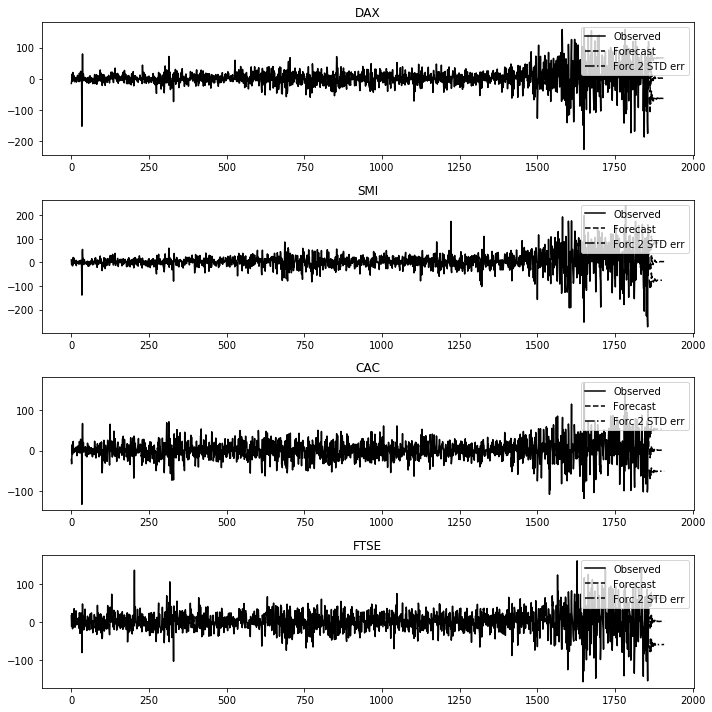

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 10))
results.plot_forecast(50)
plt.tight_layout(h_pad = 1.15)
plt.show()

In [13]:
fcast = results.forecast(EuStocksDiff.values, 50)

In [14]:
pd.DataFrame(fcast).head(10)

,0,1,2,3
0,2.741324,0.096875,4.277166,-1.866084
1,-10.667937,1.598237,-3.815663,-8.844529
2,-16.799369,-16.271632,-12.841545,-7.252005
3,-5.835582,-29.049581,-2.570316,-7.261091
4,-42.079109,-27.371264,-17.589227,-18.620932
5,5.382486,-2.529855,5.556139,14.653687
6,-18.456412,-26.073089,-9.344941,-2.803496
7,-5.182611,-6.843618,0.111457,-16.542253
8,24.483501,33.339289,9.212176,17.710238
9,6.596430,12.813030,5.150053,-3.233233


In [15]:
DAXvalues = pd.DataFrame(fcast)[0]
DAXvalues.head(10)

0     2.741324
1   -10.667937
2   -16.799369
3    -5.835582
4   -42.079109
5     5.382486
6   -18.456412
7    -5.182611
8    24.483501
9     6.596430
Name: 0, dtype: float64

In [23]:
EuStocks_DF['DAX'].tail(1)

1998-02-16    5473.72
Freq: B, Name: DAX, dtype: float64

In [26]:
import numpy as np

DeDiff = np.cumsum(DAXvalues) + float(EuStocks_DF['DAX'].tail(1))

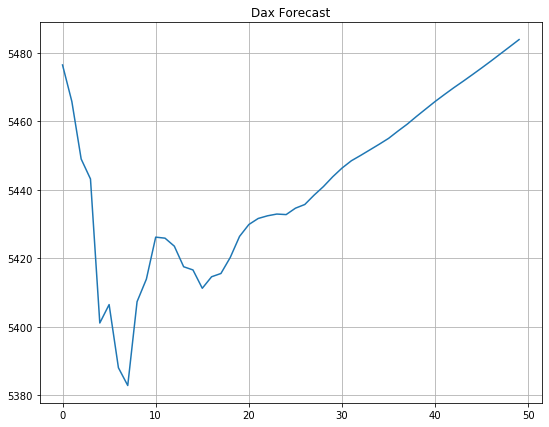

In [27]:
plt.figure(figsize = (9,7))
plt.plot(DeDiff)
plt.title('Dax Forecast')
plt.grid()
plt.show()